# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical function library
from scipy import stats

### Understanding the structure of the data

In [2]:
foodhub_df = pd.read_csv('foodhub_order.csv') # Load the csv file into a dataframe

In [3]:
foodhub_df.head(5) # Display the first 5 rows of the dataframe

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
print('total number of rows=',foodhub_df.shape[0])
print('total number of columns=',foodhub_df.shape[1])

total number of rows= 1898
total number of columns= 9


#### Observations: 
The dataset has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- *Datatypes of different columns:*
    - Numeric
        - `int64:` order_id, customer_id, food_preparation_time and delivery_time.
        - `float64:` cost_of_the_order.<br>
    - Categorical
        - `object:` restaurant_name, cuisine_type, day_of_the_week and rating.
    
    
- *Non Null Count for all the columns:* All columns have 1898 observations, which matches the total number of rows. This confirms that there are no missing values in any of the columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
foodhub_df.isna().sum() # We can also refer Non Null Count from info method

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in any column. So not applying any imputation method here.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
foodhub_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
*Food Preparation time*
- `Minimum time:` 20 minutes
- `Average time:` 27.37 minutes
- `Maximum time:` 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
foodhub_df.value_counts('rating')

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
We have 736 orders which are not rated.

#### Other Observations:
There are no ratings of 1 or 2. Possible reasons could be one of the following:
- There may be no option to select a rating of 1 or 2.
- Customers are generally not very dissatisfied with any restaurant.
- The dataset may be incomplete.
- Other potential factors.
    
    We can investigate this further and try to understand the data in the rating column in more detail.

### Exploratory Data Analysis (EDA)

In [9]:
sns.set_theme(style="darkgrid", palette="deep") #to keep the visualization style same throughout the notebook

- <b>Numeric Data:</b> We have five such columns: order_id, customer_id, food_preparation_time, delivery_time, and cost_of_the_order.

    - order_id is the unique identifier for each order, so we won’t get much insightful information from this field. Therefore, we will not perform any visualizations on this column.
    - Similarly, customer_id is the identifier for each customer. Although we won’t directly visualize it, this column can provide valuable insights, such as the number of orders a customer has placed or identifying customers who have placed the most or fewest orders, potentially to offer them incentives. However, we need to handle this column differently.

- <b>Categorical Data:</b> We have four such columns: restaurant_name, cuisine_type, day_of_the_week, and rating.
    - Previously, we observed that there are 178 unique restaurants. Visualizing such a large number of categories can be tricky, so we will handle this column separately.

In [10]:
numeric_columns = foodhub_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('order_id') #visualization is not required
numeric_columns.remove('customer_id') # Will handle this column separately

In [11]:
categorical_columns = foodhub_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('restaurant_name') # Will handle it separately

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<h3> <span style="color: gray;"> Univariate Analysis for Numeric Data </span></h3>

<h4><span style="color: skyblue;">Customer Id:</span></h4>

In [12]:
foodhub_df.customer_id.nunique() #total count of distinct customer id

1200

customer_id is a numeric column, but since there are many unique IDs (1200), we will analyze certain aspects by converting it into two groups, 1.customers who place the most orders and 2. customers who place the fewest orders. To understand it visually we will use a bar plot.

In [13]:
customer_order_counts = foodhub_df['customer_id'].value_counts().reset_index()
frequent_customer_list=customer_order_counts.head(20).sort_values(by='count',ascending=False)

To see who placed fewest number of order lets first check how many people placed a order only once.

In [14]:
customer_order_counts[customer_order_counts['count']==1].shape[0]

784

Out of 1200 people, 784 placed an order only once, so we do not need to create visualizations for the least frequent orders. Let’s instead focus on identifying who placed the most orders and see if we can find any patterns.

Even though Customer IDs are numerical values, in this case, they represent categories (each unique ID identifies a different customer). To visualize them here I will use Bar plot. 👇

## **BAR PLOT**

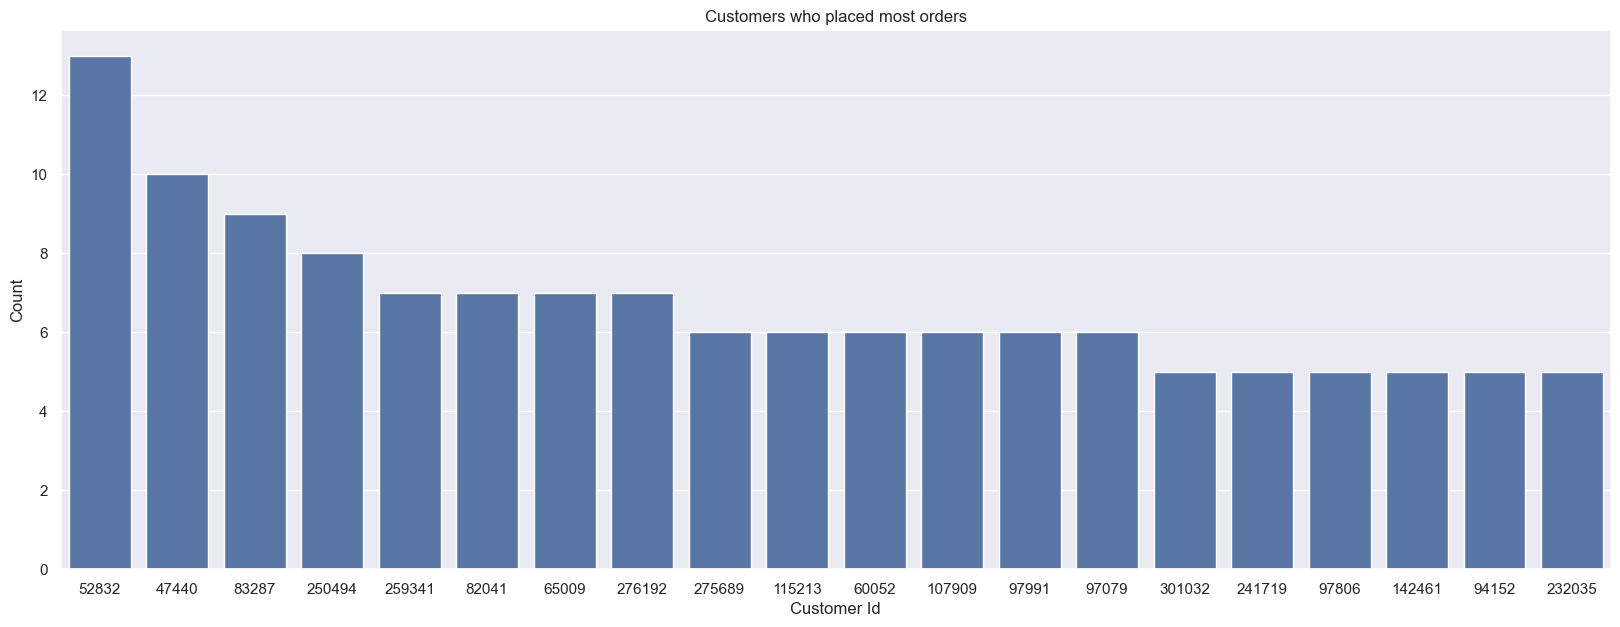

In [15]:
plt.figure(figsize=(20,7))
sns.barplot(data=frequent_customer_list, x='customer_id',y='count', order=frequent_customer_list['customer_id'])
plt.xlabel('Customer Id')
plt.ylabel('Count')
plt.title('Customers who placed most orders')
plt.show()

#### Observations:


From the above graph we can clearly identify the top four customers who placed the most of the orders, but beyond that, multiple customers placing similar number of orders.

<h4><span style="color: skyblue;">Other Numeric Columns:</span></h4>

## **HISTOGRAM**



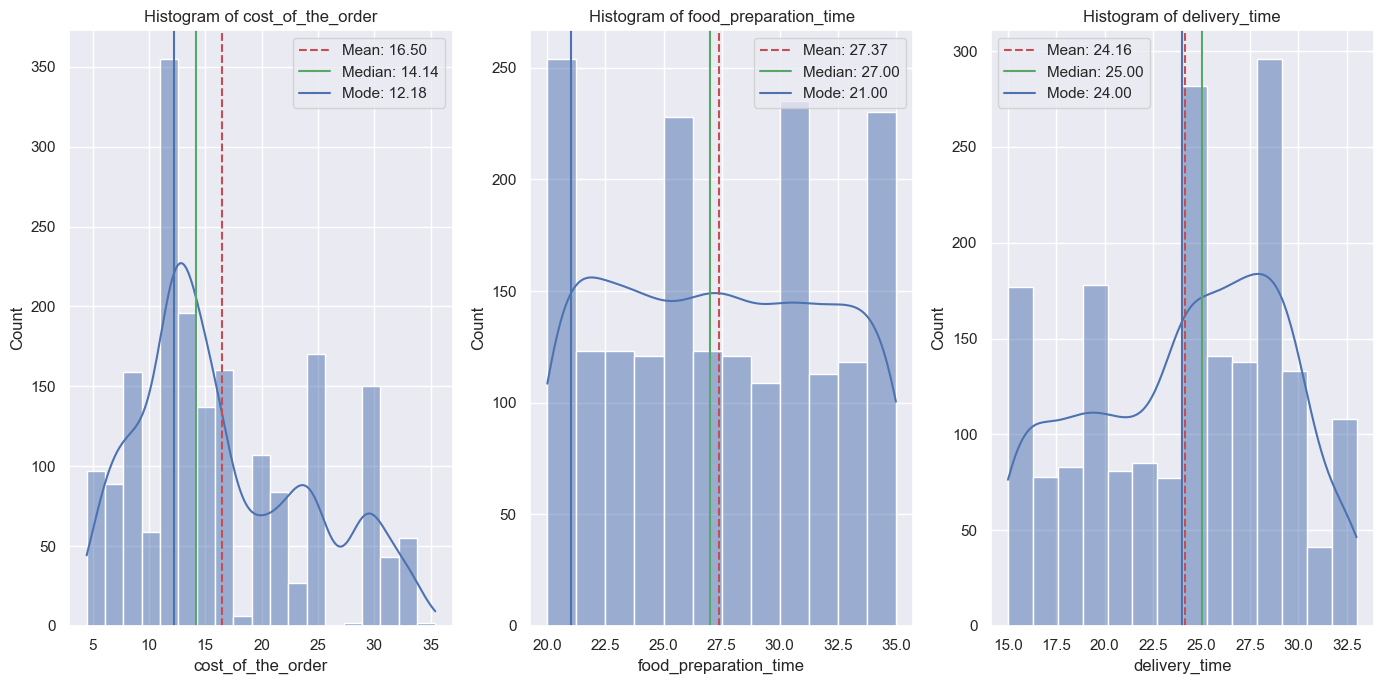

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 7))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(foodhub_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    
    # Calculate mean, median, and mode
    mean = np.mean(foodhub_df[column])
    median = np.median(foodhub_df[column])
    mode = stats.mode(foodhub_df[column], keepdims=False)[0] 

    # Add vertical lines for mean, median, and mode
    axes[i].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    axes[i].axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

#### Observations:


- *Histogram of cost_of_the_order:*
    - The distribution is skewed to the right, indicating that there are a few orders with very high costs, while the majority of orders have lower costs.
    - The peak of the distribution is approx 12.18, suggesting that this is the most common cost per order.
- *Histogram of food_preparation_time:*
    - The distribution appears to be quite uniform, but upon closer examination we can see the distribution is right skewed with frequent spikes in the data, particularly around 20, 25, 30 and 35 minutes.
- *Histogram of delivery_time:*
    - The distribution is relatively right skewed, with the peak at 24 mins, indicating a smaller number of orders taking significantly longer than the average where most orders are taking lesser time.

## **BOXPLOT**



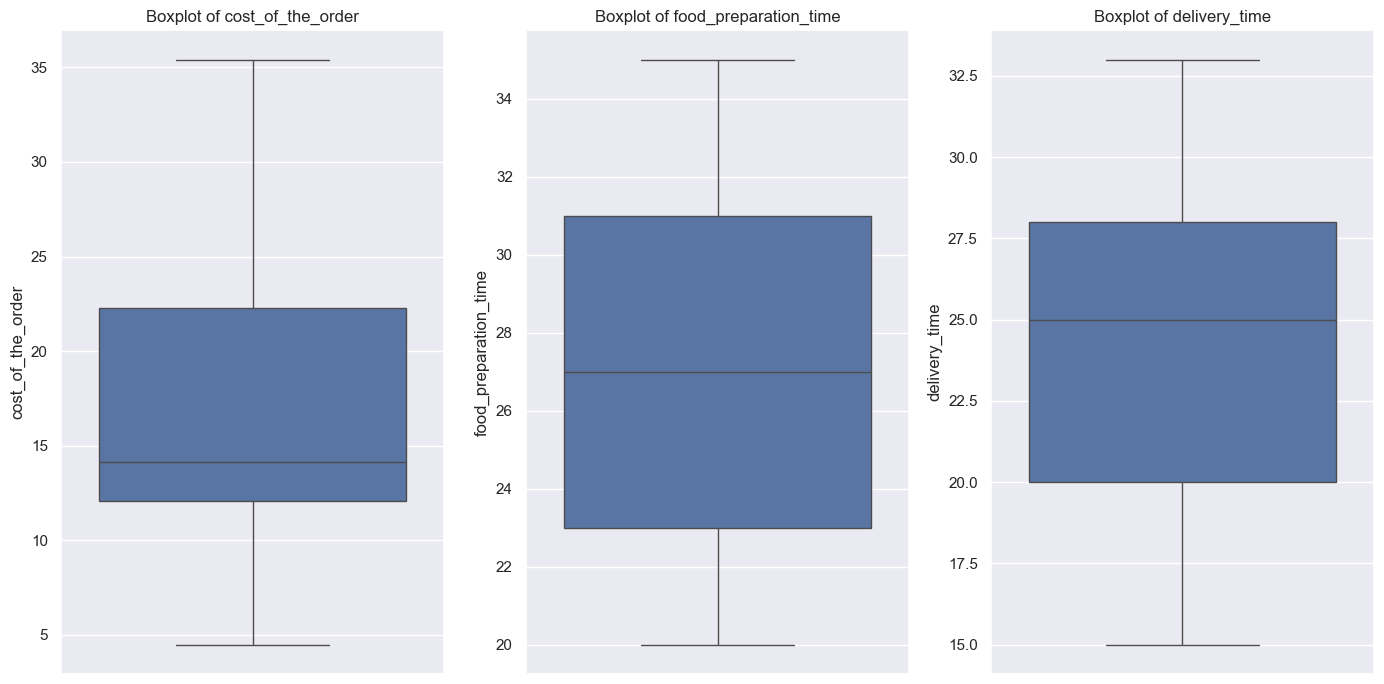

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 7))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=foodhub_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Observations:


- There are no outliers in any of the three graphs.
- 50% of the orders cost between 12-22 dollars.
- The median cost of the order is below 15 dollars.
- 50% of the orders are prepared within 23 to 31 mins.
- The median food preparation time is 27 mins.
- 50% of the orders are delivered within 20-28mins.
- The median delivery time is 25 mins.

<i>Note: All values are approximations based on the graphs.</i>

<h3> <span style="color: gray;"> Univariate Analysis for Categorical Data </span></h3>

## **COUNT PLOT**
Previously, we observed that there are 178 restaurant entries, so we will handle this category differently. We will only plot restaurants with more than 30 orders. We can adjust this threshold later, but for now, a lower number makes it easier to visualize.


In [18]:
restaurant_count = foodhub_df.value_counts('restaurant_name').reset_index()
top_restaurants = restaurant_count[restaurant_count['count']>30]

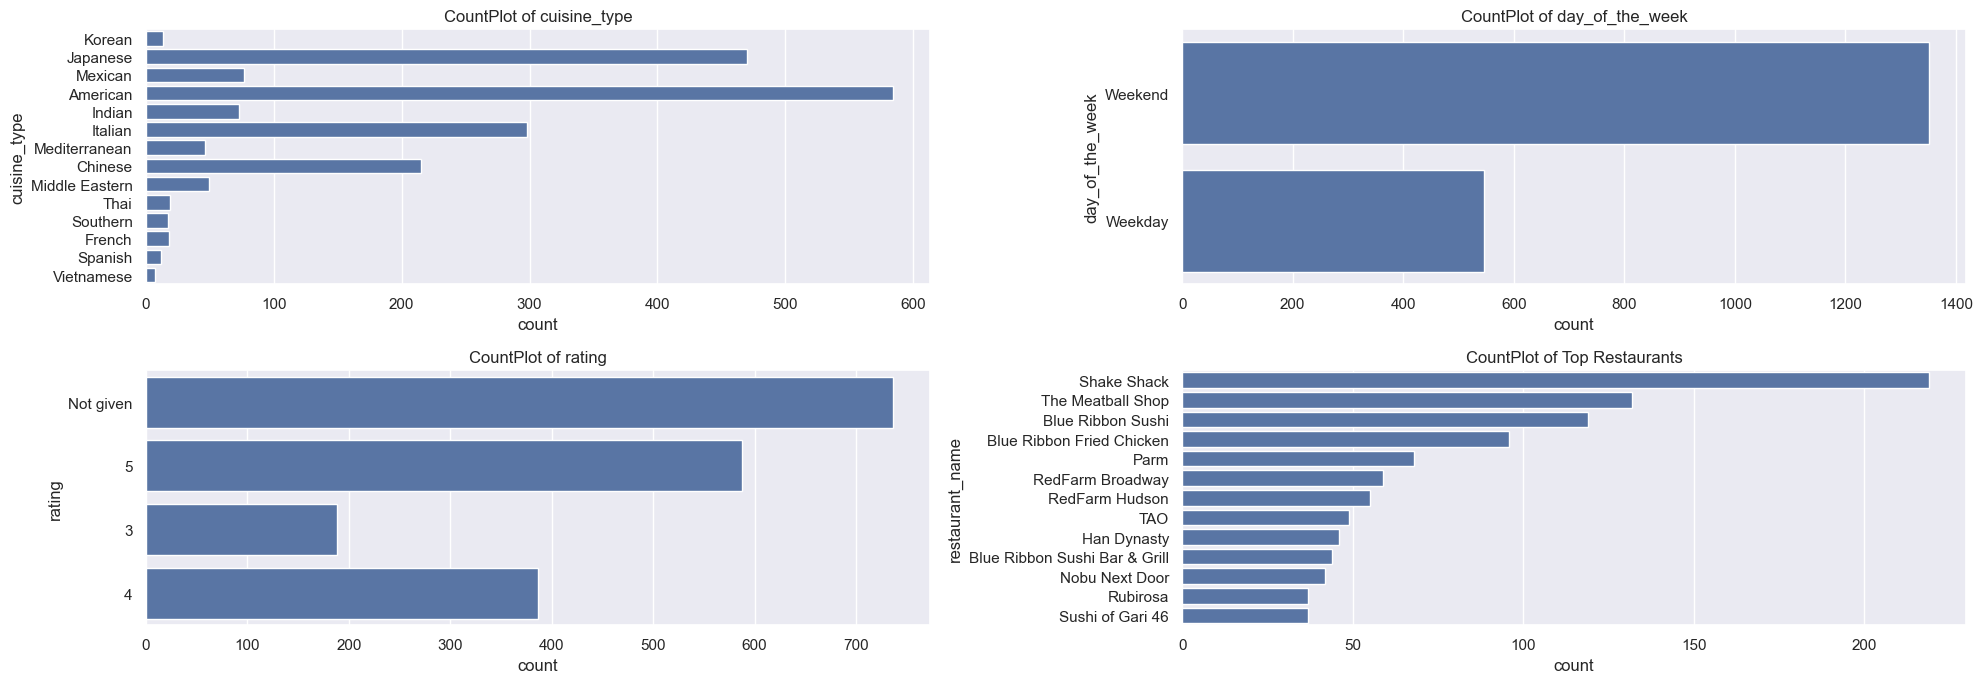

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=foodhub_df[column], ax=axes[i])
    axes[i].set_title(f'CountPlot of {column}')
    
sns.barplot(data=top_restaurants, y='restaurant_name',x='count', ax=axes[3])
axes[3].set_title(f'CountPlot of Top Restaurants')

plt.tight_layout()
plt.show();

#### Observations:


- *Cuisine Type:*
    - American food is the most ordered, followed by Japanese and Italian cuisine.
    - Aside from the top four cuisines, all others were ordered fewer than 100 times.
- *Day Of the Week:*
    - Orders on weekends are more than double those on weekdays. As a result, the total number of orders over the two weekend days exceeds the total for the five weekdays.
- *Rating:*
    - Most customers preferred not to give a rating or forgot to do so.
    - Among those who did, a rating of 5 was given more often than 4 or 3.
    - The lowest rating recorded is 3.
- *Top Restaurant:*
    - Only three restaurants have more than 100 orders, with Shake Shack being the only one with over 200 orders.
    - The second most popular restaurant is “The Meatball Shop.” There is a significant difference in the number of orders between Shake Shack and The Meatball Shop, with the latter having fewer than 150 orders.
    - Except top 3 restaurants all other restaurants have fewer than 100 orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
top_restaurants.head(5)

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


top 5 restaurants in terms of the number of orders received are
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Previously, using univariate analysis, we saw that American food is the most popular. However, to determine the most popular cuisine on weekends, we can either use code or visualize the data. In this case, we are using code.

In [21]:
foodhub_df[foodhub_df.day_of_the_week=='Weekend'].cuisine_type.value_counts().reset_index().head(1)

,cuisine_type,count
0,American,415


#### Observations:


American cuisine is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
foodhub_df[foodhub_df.cost_of_the_order>20].shape[0]/foodhub_df.shape[0]*100

29.24130663856691

#### Observations:


29.24% orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
foodhub_df.delivery_time.mean()

24.161749209694417

#### Observations:


Mean order delivery time is approx 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
frequent_customer_list.customer_id.head(3).to_list()

[52832, 47440, 83287]

#### Observations:


Customer 52832, 47440 and 83287 are the top 3 most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Before we start multivariate analysis lets first try to create a new column total delivery time which will be the sum of food preparation time and delivery time.

In [25]:
foodhub_df['total_delivery_time']=foodhub_df['food_preparation_time']+foodhub_df['delivery_time']

<h3> <span style="color: gray;"> Multivariate Analysis for Numeric vs Numeric Columns </span></h3>

## **HEATMAP:**
Lets try to understand the relationship between all the numeric columns among themselves. To understand how much correlated they are I will use heatmap and pairplot.

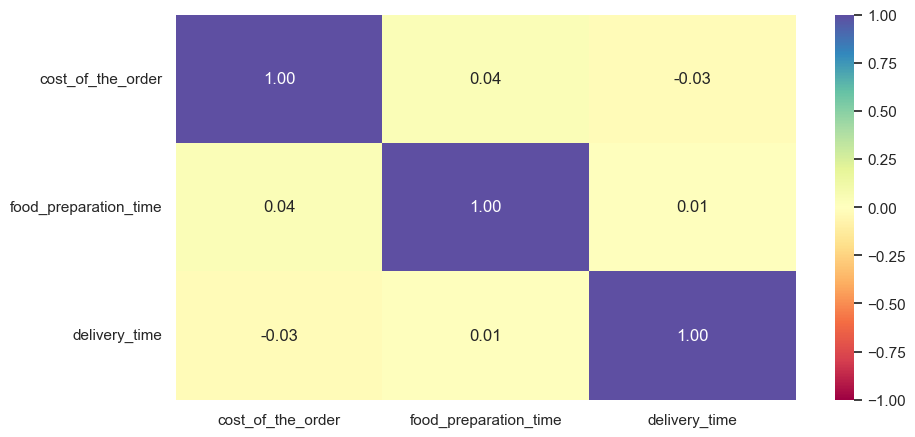

In [26]:
# Check for correlation among numerical variables
corr = foodhub_df[numeric_columns].corr()

# plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation:


- We can see that none of the columns are highly correlated. The low correlation might indicate that the variables are either independent of each other or that their relationship is more complex and not captured well by a simple linear measure. Let’s try using a pairplot to see if any non-linear relationships exist.

## **PAIRPLOT**

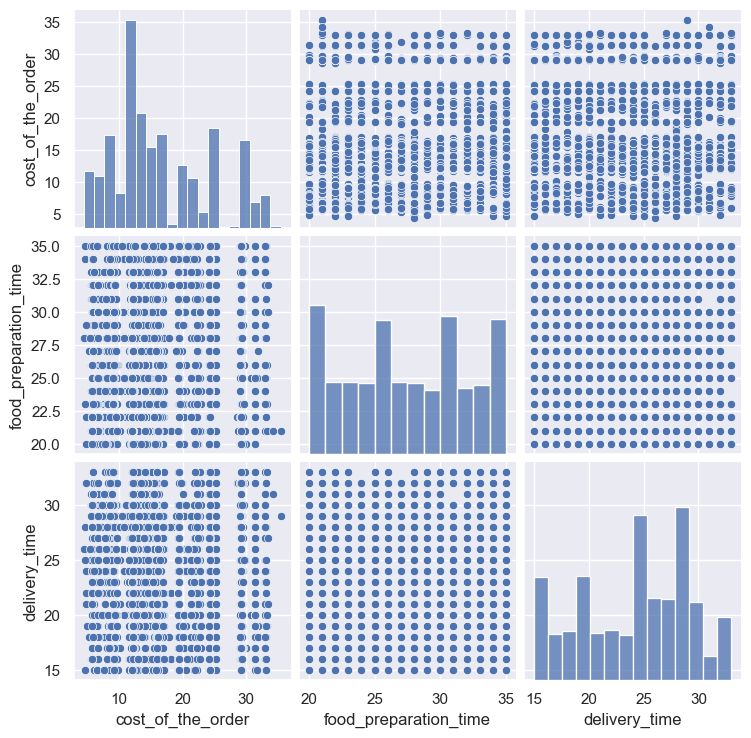

In [27]:
sns.pairplot(foodhub_df[numeric_columns])
plt.show()

#### Observation:


- We can not see any evident relationship between these variables.

#### Multivariate Analysis with Categorical Data:

<b>Let’s explore a few key questions using visualization:</b>
- Multivariate Analysis for Numeric vs Categorical Columns
    - Is there a relationship between rating and total delivery time?
    - Does any particular cuisine take more time to prepare than others?
    - Is there a relationship between a cuisine type and the cost of the order?
    - Is the cost of the order similar between weekdays and weekends?
    - Is there a relationship between a restaurant’s rating and the cost of the order?
- Multivariate Analysis for Categorical vs Categorical Columns
    - Does the rating have any relationship with the cuisine type?
    - Is the rating consistent on Weekend and Weekdays?

<h3> <span style="color: gray;"> Multivariate Analysis for Numeric vs Categorical Columns </span></h3>

## **Violin Plot**

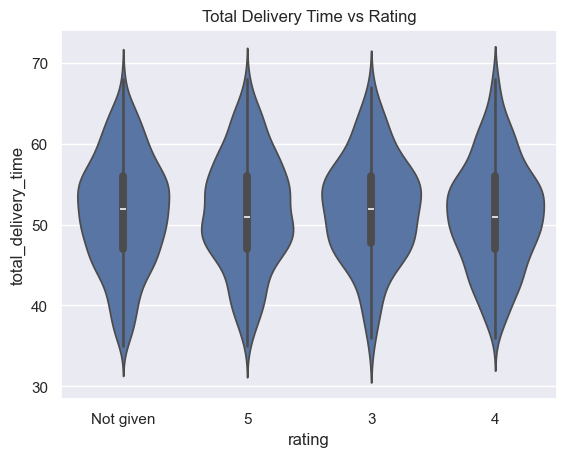

In [28]:
sns.violinplot(x='rating', y='total_delivery_time', data=foodhub_df)
plt.title('Total Delivery Time vs Rating')
plt.show()

#### Observations:


- We can observe the median delivery time for rating "not given" and "3" is higher than "5" and "4" rating. But the difference is not significant.
- The peak value for "Not Given" and "3" is approx 54-55 mins where the peak value for rating 5 is below 50.
- Overall we can say relatively rating "5" takes lesser time than rating "Not Given" and "3".

# Box Plot

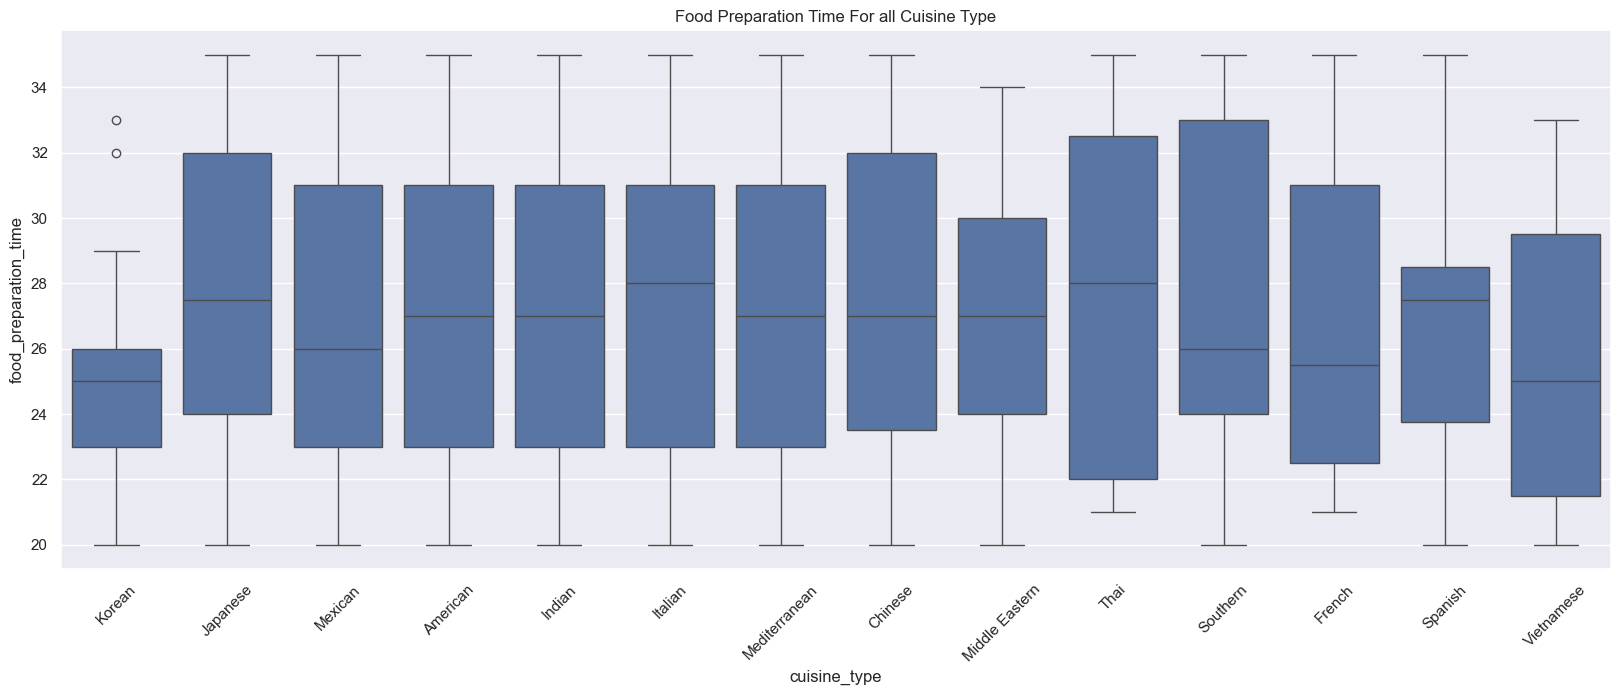

In [29]:
plt.figure(figsize=(20,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=foodhub_df)
plt.xticks(rotation=45)
plt.title('Food Preparation Time For all Cuisine Type')
plt.show()

#### Observations:


- The IQR is the smallest for Korean cuisine, which indicates low variability in food preparation time. This suggests that Korean dish preparation time is most consistent than other cuisines.
- The median preparation time for Korean food is around 25 minutes, making it one of the fastest to prepar
- Both Middle Eastern and Spanish cuisines have relatively smaller IQRs, indicating consistent preparation times with less variability. This suggests that customers can expect fairly predictable preparation times for these cuisines.
- Thai cuisines have largest IQR, suggesting that its preparation times vary considerably. Customers may experience a range of preparation times depending on the specific dishes ordered.

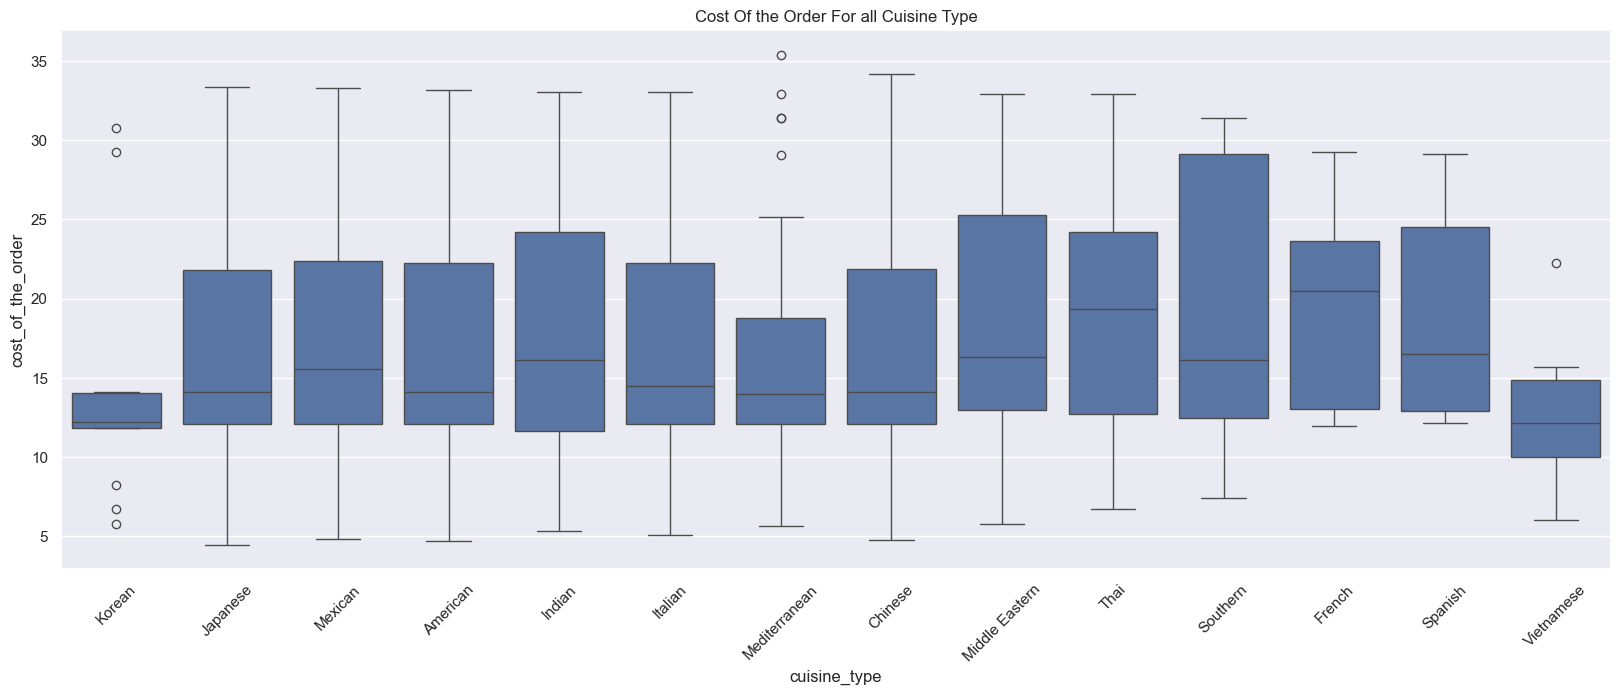

In [30]:
plt.figure(figsize=(20,7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=foodhub_df)
plt.xticks(rotation=45)
plt.title('Cost Of the Order For all Cuisine Type')
plt.show()

#### Observations:


- Korean and Vietnamese food IQR are narrowest which suggests less variability in the order cost, except some outliers the cost of these two cuisine seems the lowest of all.
- Our top four cuisines show a pattern in cost: all have a median cost of less than 15. However, while Korean, Mediterranean, and Vietnamese cuisines also have median costs below 15, they don’t have many orders, indicating that the relationship might be more complex.
- The median cost is highest for French cuisine, and its IQR is not very wide, suggesting that French food generally costs more.
- There are a few outliers in Korean, Mediterranean, and Vietnamese cuisines. This indicates that Mediterranean and Vietnamese foods sometimes cost unusually more than expected, while Korean food can be unusually expensive or cheaper than usual.
- Southern cuisine has the widest IQR among all cuisines, suggesting it has the most variability in cost.

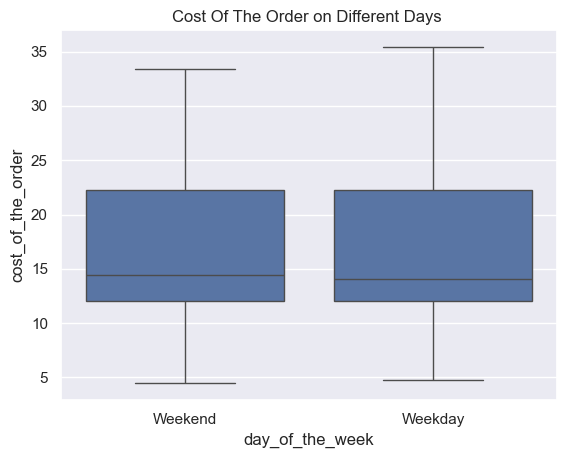

In [31]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=foodhub_df)
plt.title('Cost Of The Order on Different Days ')
plt.show()

#### Observations:


- The median and interquartile range (IQR) are fairly similar between weekends and weekdays. We can conclude that the cost of an order is almost the same on weekdays and weekends, with the median cost slightly lower on weekends.
- In some cases, the cost of an order on weekdays exceeds the cost on weekends.

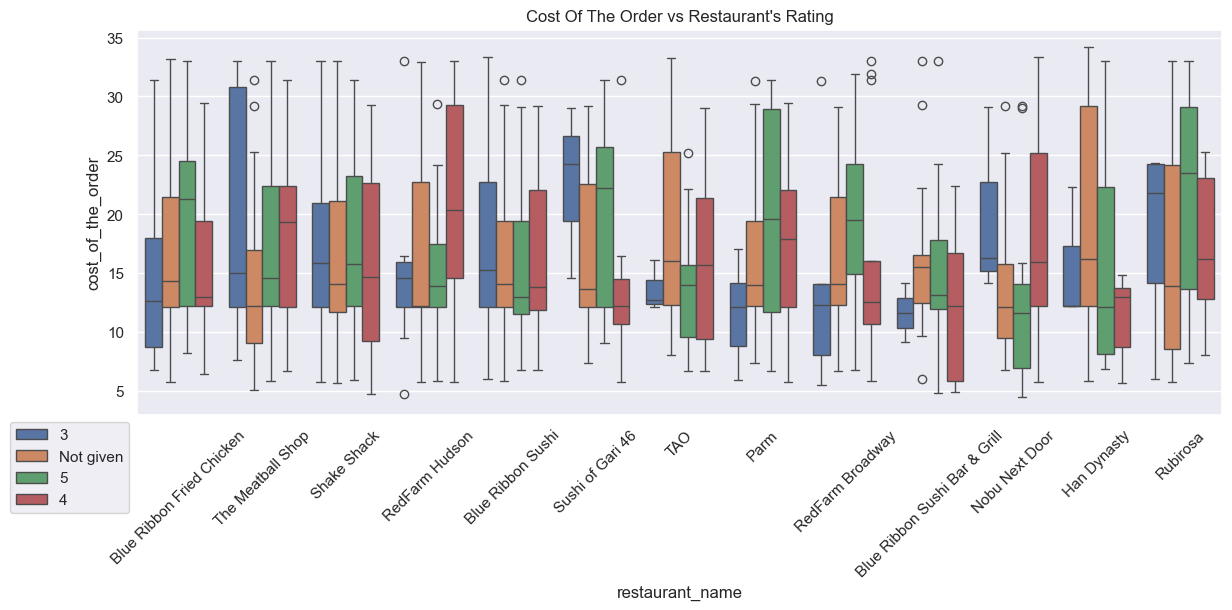

In [32]:
foodhub_df_top_restaurants= foodhub_df[foodhub_df['restaurant_name'].isin(top_restaurants['restaurant_name'])]

plt.figure(figsize=(14,5))
sns.boxplot(x='restaurant_name', y='cost_of_the_order', hue='rating', data=foodhub_df_top_restaurants)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0, 0))
plt.title("Cost Of The Order vs Restaurant's Rating")
plt.show()

#### Observations:


- We observe that cost does not directly impact the rating. For example, at Rubirosa and Parm, the cost range for a rating of 5 varies from approximately 12 to 29 dollars, while lower-cost orders received a rating of 3. This pattern is similar across other restaurants as well.
- The presence of outliers suggests that there might be some exceptional cases or data errors that could be further investigated.

<h3> <span style="color: gray;"> Multivariate Analysis for Categorical vs Categorical Columns </span></h3>

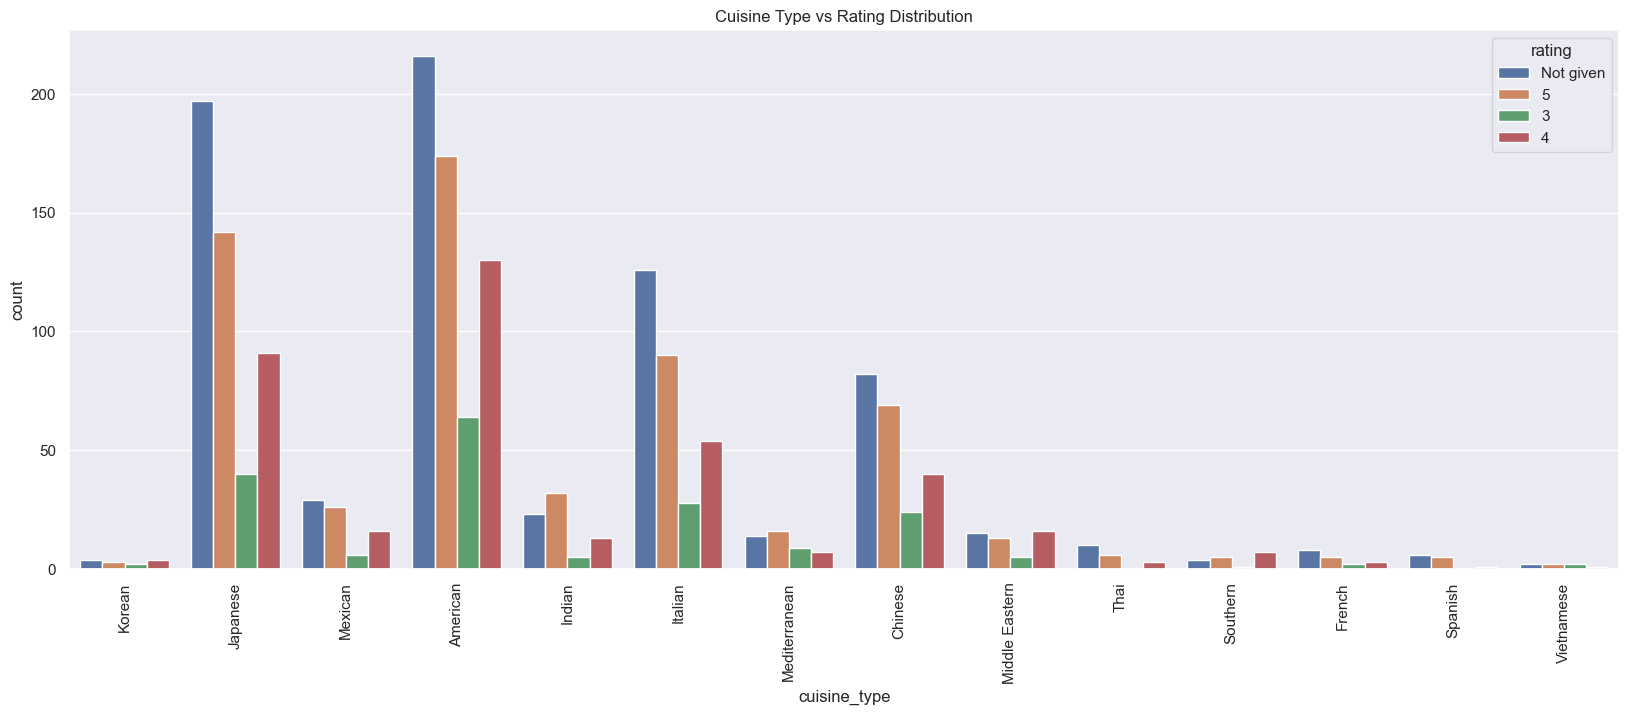

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(x='cuisine_type', hue='rating', data=foodhub_df)
plt.title('Cuisine Type vs Rating Distribution')
plt.xticks(rotation=90)
plt.show()

#### Observations:


- For most restaurants, the majority of orders did not receive any rating. However, in certain cuisines like Indian and Mediterranean, most orders received a rating of 5, compared to other ratings within the same cuisine.
- In most restaurants, a rating of 3 was given to the fewest number of orders, except for Mediterranean cuisine, where more orders received a rating of 3 than a rating of 4.
- The top 4 rated cuisines are American, Japanese, Italian, and Chinese. In all these cuisines, the majority of orders did not receive any rating, followed by ratings of 5, 4, and 3.

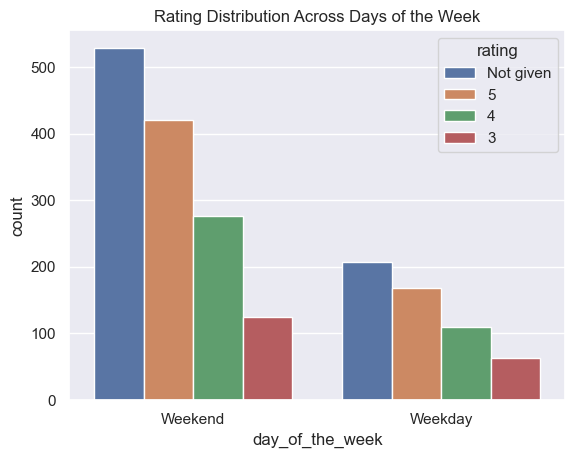

In [34]:
sns.countplot(x='day_of_the_week', hue='rating', data=foodhub_df, hue_order=['Not given', '5', '4', '3'])
plt.title('Rating Distribution Across Days of the Week')
plt.show()

#### Observations:


It seems that the customers’ rating behavior does not change much based on the day of the week. When customers place an order, they are most likely to not give any rating, followed by giving ratings of 5, 4, and 3.

<h3> <span style="color: gray;"> Analysis for Frequent Customers </span></h3>

Here, we will try to identify why these customers are frequent. If we find a pattern, we can apply the same strategy to other customers.

- Do frequent customers prefer certain restaurants over others?
- Do they favor particular cuisines?
- What kind of ratings do they give?
- What are their spending habits on food orders?
- Do they prefer to order on weekends or weekdays?

In [35]:
# creating a new dataframe which will include only the customers who placed the most orders.
frequent_customers_df = pd.merge(foodhub_df, frequent_customer_list, on='customer_id')

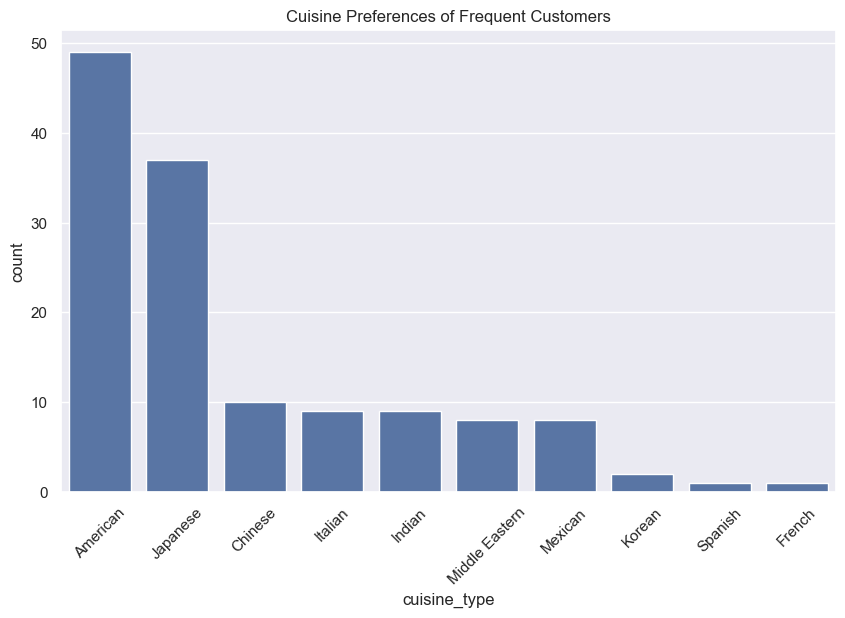

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', data=frequent_customers_df, order=frequent_customers_df['cuisine_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cuisine Preferences of Frequent Customers')
plt.show()

#### Observations:


Frequent customers prefer American and Japanese cuisine. Previously, we observed that in the entire dataset, American cuisine was the most popular, followed by Japanese. However, in the larger dataset, the third most ordered cuisine was Italian, whereas for frequent customers, the third most ordered cuisine is Chinese, closely followed by Italian.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


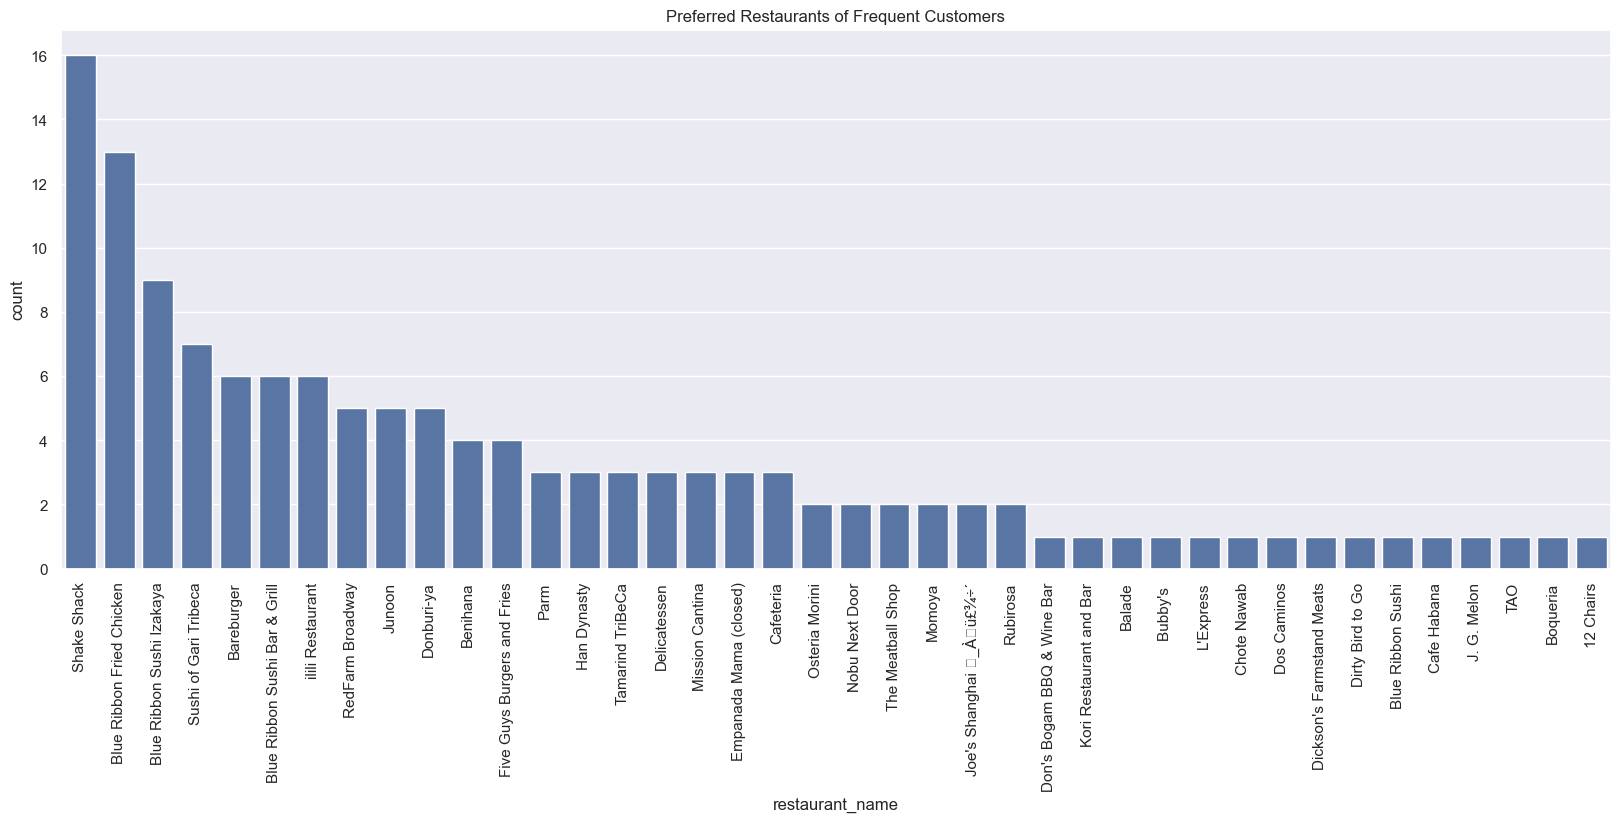

In [37]:
# Count plot for preferred restaurants
plt.figure(figsize=(20, 7))
sns.countplot(x='restaurant_name', data=frequent_customers_df, order=frequent_customers_df['restaurant_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Preferred Restaurants of Frequent Customers')
plt.show()

#### Observations:


- Frequent customers prefer Shake Shack the most, followed by Blue Ribbon Fried Chicken, Blue Ribbon Sushi Izakaya and Sushi of Gari Tribeca.

In [38]:
# Lets see what is the average rating of these four restaurants
specific_restaurants = ['Shake Shack','Blue Ribbon Fried Chicken','Blue Ribbon Sushi Izakaya','Sushi of Gari Tribeca']

# Filterout all the rows where rating is not given
rated_restaurants = foodhub_df[foodhub_df.rating!='Not given']
rated_restaurants.loc[:, 'rating'] = rated_restaurants['rating'].astype(int)

freq_customers_fav_restaurant_df = rated_restaurants[rated_restaurants['restaurant_name'].isin(specific_restaurants)].groupby('restaurant_name')['rating'].mean().reset_index()
freq_customers_fav_restaurant_df

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi Izakaya,4.333333
2,Shake Shack,4.278195
3,Sushi of Gari Tribeca,4.615385


#### Observations:


We can see that all four restaurants have ratings above 4, with "Sushi of Gari Tribeca" having the highest average rating of 4.62.

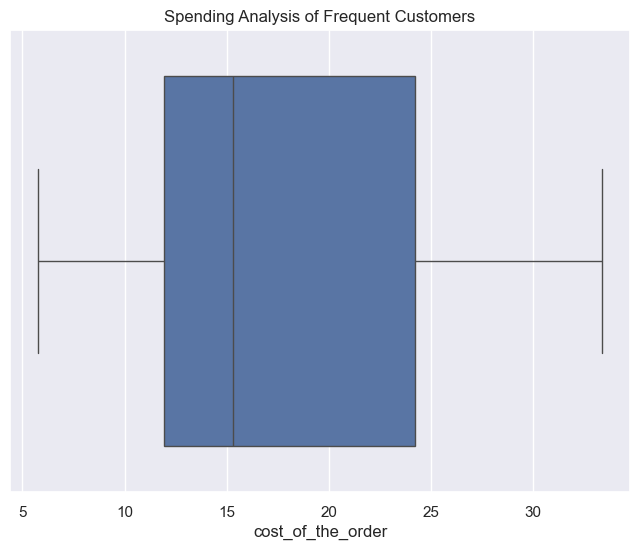

In [39]:
# Count plot for day of the week (Weekday vs Weekend)
plt.figure(figsize=(8, 6))
sns.boxplot(x='cost_of_the_order', data=frequent_customers_df)
plt.title('Spending Analysis of Frequent Customers')
plt.show()

#### Observations:


- From the graph we can say cost of the orders for frequent customers mostly falls between around 12 and 24 dollars.
- The frequent customer's cost of the order ranges from 6 to 34 dollars.
- There is no outliers present so the cost of the orders is relatively consistent.

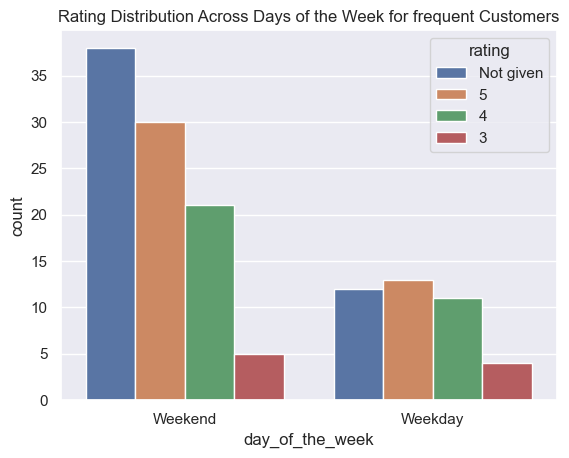

In [40]:
sns.countplot(x='day_of_the_week', hue='rating', data=frequent_customers_df, hue_order=['Not given', '5', '4', '3'])
plt.title('Rating Distribution Across Days of the Week for frequent Customers')
plt.show()

#### Observations:


- Frequent customers place more than twice as many orders on weekends compared to weekdays.
- On weekdays, they order less frequently, but when they do, they tend to give more 5-star ratings compared to other ratings than they do on weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
rating_counts = rated_restaurants.groupby('restaurant_name')['rating'].count().reset_index(name='rating_count')
top_rated_restaurants = rating_counts[rating_counts['rating_count'] > 50]['restaurant_name']
mean_ratings = rated_restaurants[rated_restaurants['restaurant_name'].isin(top_rated_restaurants)].groupby('restaurant_name')['rating'].mean().reset_index()
highly_rated_restaurants = mean_ratings[mean_ratings['rating'] > 4]['restaurant_name']

highly_rated_restaurants.tolist()

['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop']

#### Observations:
The Top 4 star rated restaurant having more than 50 ratings are :
- Blue Ribbon Fried Chicken,
- Blue Ribbon Sushi,
- Shake Shack,
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15
    else:
        return 0

foodhub_df['revenue'] = foodhub_df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = foodhub_df['revenue'].sum()
print(f"Total revenue generated by the company across all the orders = {total_revenue} dollars.")

Total revenue generated by the company across all the orders = 6166.303 dollars.


#### Observations:


Considering Net revenue = Total revenue as we do not know other expenses by the company we can say , 6166.303 dollars is the net revenue generated by the company across all orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [43]:
foodhub_df[foodhub_df.total_delivery_time>60].shape[0]/foodhub_df.shape[0]*100

10.537407797681771

#### Observations:


Approx 10.54% orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
foodhub_df.groupby(['day_of_the_week']).delivery_time.mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:


The mean delivery time is shorter on weekends (22.47 minutes) compared to weekdays (28.34 minutes). This suggests that, on average, deliveries are faster during weekends than on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

Earlier, we discussed each visualization in detail. Here, we will summarize all our observations:
<br>
<span style="color:gray;">
<i>Note: For detailed observations, please refer to the individual graphs.</i></span>

We have analyzed 1898 orders data from an online food aggregator named FoodHub.<br>
Our conclusions are as follows:
- Frequent customers prefer Shake Shack the most, followed by Blue Ribbon Fried Chicken, Blue Ribbon Sushi Izakaya, and Sushi of Gari Tribeca. In the entire dataset, the top four most ordered restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.
- We have observed that, on average, the restaurants mentioned above all have ratings above 4.
- Overall, American food is the most popular cuisine, followed by Japanese and Italian. Frequent customers’ top three cuisines are American, Japanese, and Chinese.
- Most customers place orders primarily on weekends.
- Total delivery time slightly impacts the rating. For a rating of 5, the median total delivery time is lower than for ratings of “Not given” and 3.
- Frequent customers’ orders range from 6 to 34 dollars, while overall order costs range from 4 to 36 dollars. The median order cost is below 15 dollars.
- On weekdays, frequent customers order less frequently, but when they do, they tend to give more 5-star ratings compared to other ratings than they do on weekends.
- Order costs typically fall between 12 and 24 dollars for all customers, including frequent ones.
- Our top four ordered cuisines all have a median cost of less than 15 dollars.  However, despite Korean, Mediterranean, and Vietnamese cuisines also having a median cost below 15 dollars, they do not have many orders, suggesting a more complex relationship.
- For most restaurants, the majority of orders did not receive any rating. However, in cuisines like Indian and Mediterranean, most orders received a rating of 5.
- Except for some outliers, Korean and Vietnamese foods have the lowest costs. In contrast, French cuisine has the highest median cost, with a narrow IQR indicating that French food generally costs more.

### Recommendations:

- <b>Cuisine Preferences:</b> Customers who frequently order prefer American, Japanese, and Chinese food, though Chinese food ranks 4th overall in order volume. Chinese food has a higher ratio of 5-star ratings compared to American, Japanese, and Italian cuisines. We could consider recommending Chinese food to new users or who hvn't ordered chinese before.
- <b>Offer:</b> Orders are lower on weekdays compared to weekends. Offering incentives could encourage customers to place more orders on weekdays.
- <b>Managing Expectation:</b> Some orders take longer to prepare. Setting customer expectations for these restaurants can help avoid last-minute surprises.
- <b>Delivery Staffing:</b> Since most orders are placed on weekends, increasing the number of delivery personnel on weekends could help reduce delivery times.
- <b>Price Adjustments:</b> Consider adjusting the price of cuisines based on demand. Extremely low prices may raise suspicions, while high prices might be unaffordable for many customers.
- <b>Loyalty Program: </b> Customers who frequently order a particular cuisine or from a specific restaurant might be more likely to join a loyalty program. Mapping them to their preferred restaurants and cuisines could act as an incentive.
- <b>Quality Improvement:</b> Physically investigate the quality of orders from restaurants and provide assistance to help them improve where necessary.
- <b>System Improvement:</b> Recommend top-choice and top-rated restaurants to new customers if this strategy isn’t already in place in the application.

### Further Analysis that can be done

-  Investigate why there are no ratings of 1 or 2. This might involve checking if there’s a bias in the rating system or if there are external factors influencing the absence of these lower ratings.
- Most customers have ordered only once. We should explore possible reasons for their lack of repeat business, such as issues with food quality, delivery times, or customer service.
- Identify which restaurants and cuisines are frequented by the same customers. Analyzing these trends could allow us to recommend these popular restaurants/cuisines to other customers.
- The dataset was relatively small. Gathering more data could help uncover additional trends and validate the current findings.
- To attract and retain customers, consider implementing personalized recommendation systems based on customer preferences, order history, and ratings. Additionally, offer promotions, loyalty programs, and incentives for repeat orders.
- To increase business, we could explore increasing the commission or fees from customers or decreasing operational expenses. Analyzing more features related to revenue and costs will provide better insights for making these decisions.
- If we analyze how the trends in orders, ratings, and other features change over time, it will be easier to predict future patterns.

---